# KNN 

In [10]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, ShuffleSplit, validation_curve
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from category_encoders.one_hot import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV ,cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score

In [11]:
def my_learn_curve(title="some title", 
                   estimator=None, 
                   cv = None ,
                   X=None,
                   y=None,
                   label_suffix =  None,
                   color_= [],
                   shape='o-'):
    plt.title(title)
    plt.ylim(0.0, 1.01)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 10),
                       return_times=True)
    train_scores_mean =  1.0 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean =  1.0 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes,  train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes,  test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, shape, color=color_[0],
                 label="Training Error - {}".format(label_suffix))
    plt.plot(train_sizes, test_scores_mean,shape, color=color_[1],
                 label="Cross-validation Error - {}".format(label_suffix))
    plt.legend(loc="best")
    plt.ylabel("Error")
    return plt

In [12]:
parent_dir = '/mnt/c/users/17752/Documents/GeorgiaTech/machine_learning'

# Liver Data 

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
parent_dir = '/mnt/c/users/17752/Documents/GeorgiaTech/machine_learning'
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df.drop_duplicates(inplace=True)
impute_Albumin_and_Globulin_Ratio = liver_df[~liver_df.Albumin_and_Globulin_Ratio.isna()].Albumin_and_Globulin_Ratio.mean()
filt_ =  liver_df.Albumin_and_Globulin_Ratio.isna()
liver_df.loc[filt_, "Albumin_and_Globulin_Ratio" ]= impute_Albumin_and_Globulin_Ratio
assert sum(liver_df.Albumin_and_Globulin_Ratio.isna()) == 0 
# format response 
liver_df.loc[(liver_df.Dataset ==2), "Dataset" ] = -1
liver_df.head(10)
liver_df.loc[:,"Gender"] = pd.get_dummies(liver_df.Gender, prefix='gender').drop("gender_Male", axis =1  ).gender_Female
X = liver_df.loc[:, "Age":"Albumin_and_Globulin_Ratio"]
y = liver_df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=62)

#('over', SMOTE(sampling_strategy="minority")
#inital shot 
liver_steps = [('scaler', StandardScaler()),
               ("model", KNeighborsClassifier())]
liver_pipeline = Pipeline(steps=liver_steps)

stratified_kfold = StratifiedKFold(n_splits = 10, random_state=42, shuffle=True)
scores = cross_val_score(liver_pipeline, X_train, y_train, scoring='accuracy', cv=stratified_kfold, n_jobs=3)
liver_pipeline.fit(X_train,y_train).score(X_train,y_train)

0.7960526315789473

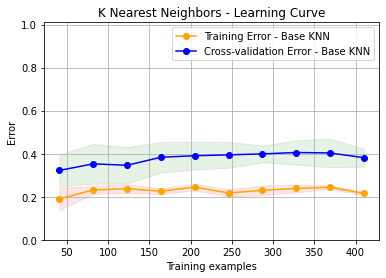

In [105]:
my_learn_curve(title="K Nearest Neighbors - Learning Curve", 
               estimator=liver_pipeline.fit(X_train,y_train), 
               cv=stratified_kfold, 
               X=X_train,
               y=y_train,
               label_suffix="Base KNN", 
               color_=["orange","blue"],
               shape = 'o-'  )
plt.savefig("KNN_BASE_LEARNING_CURVE")

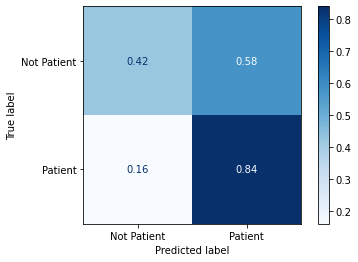

In [68]:
plot_confusion_matrix(estimator= liver_pipeline.fit(X_train,y_train).fit(X_train,y_train), X=X_test, y_true= y_test  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

In [ ]:
# print(grid_result_l.best_estimator_.get_params())
# print(classification_report(y_train, grid_result_l.predict(X_train) ))
# print(classification_report(y_test, grid_result_l.predict(X_test) ))

## Validation Curve

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
X_train.shape[0]

(456, 10)

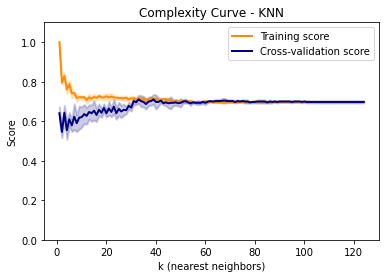

In [43]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(liver_pipeline,
                                              X_train,
                                              y_train, 
                                              param_name =  "model__n_neighbors",
                                            param_range =[ i for i in range (1,125, 1)] ,
                                            cv=cv)

param_range =   np.array([ i for i in range (1,125, 1)])
train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Complexity Curve - KNN")
plt.xlabel("k (nearest neighbors)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("KNN_LIVER_n_Neighbors.pdf")

plt.show()

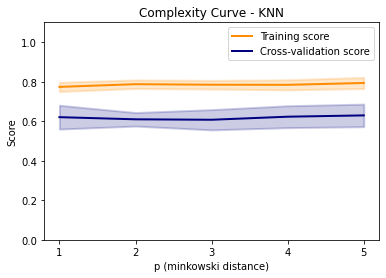

In [58]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(liver_pipeline,
                                              X_train,
                                              y_train, 
                                              param_name =  "model__p",
                                            param_range =[ i for i in range (1,6, 1)] ,
                                            cv=cv)

param_range =   np.array([ i for i in range (1,6, 1)])
train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Complexity Curve - KNN")
plt.xlabel("p (minkowski distance)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.xticks([ i for i in range (1,6, 1)],[ i for i in range (1,6, 1)])

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("KNN_LIVER_n_minkowski_p.pdf")

plt.show()



## Grid Search Liver 

In [8]:
# Set the parameters by cross-validation



tuned_parameters = {'model__n_neighbors': [i for i in range(1,40,1)], 
                    'model__p': [i for i in range(1,6,1)],
                    'model__weights': ["uniform"]}
                    


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=45)
# define the grid search procedure
grid_search = GridSearchCV(estimator=liver_pipeline, param_grid=tuned_parameters, 
                           n_jobs=-1, cv=cv, 
                           scoring='average_precision')
# execute the grid search
grid_result_l= grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result_l.best_score_, grid_result_l.best_params_))
# summarize all scores that were evaluated
means = grid_result_l.cv_results_['mean_test_score']
stds = grid_result_l.cv_results_['std_test_score']
params = grid_result_l.cv_results_['params']

Best: 0.847174 usin g {'model__n_neighbors': 39, 'model__p': 1, 'model__weights': 'uniform'}


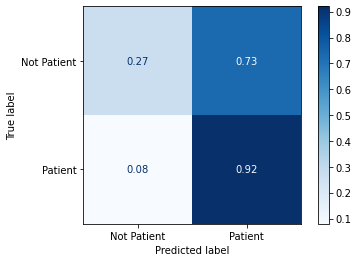

In [124]:
plot_confusion_matrix(estimator= grid_result_l, X=X_test, y_true= y_test  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

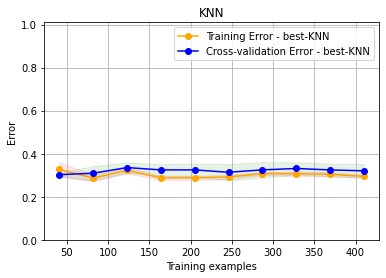

In [9]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=45)
my_learn_curve(title="KNN", 
               estimator=grid_result_l.best_estimator_, 
               cv=cv, 
               X=X_train,
               y=y_train,
               label_suffix="best-KNN", 
               color_=["orange","blue"],
               shape = 'o-'  )
plt.savefig("knn_final_learning_curve.pdf")

In [ ]:
# Best: 0.906910 usin g {'model__activation': 'logistic', 'model__alpha': 0.035807142857142864, 'model__learning_rate': 'invscaling', 'model__max_iter': 70, 'model__solver': 'lbfgs'}

In [20]:
average_precision_score( y_train, liver_pipeline.fit(X_train, y_train).predict_proba(X_train)[:,1])

0.89732924186148

In [18]:
average_precision_score( y_train, final_liver.predict_proba(X_train)[:,1])

0.8716363560319653

In [19]:
average_precision_score( y_test, final_liver.predict_proba(X_test)[:,1])

0.909531890693394

In [16]:
final_liver = grid_result_l.best_estimator_.fit(X_train,y_train)
print(final_liver.get_params())
print(classification_report(y_train, final_liver.predict(X_train) ))
print(classification_report(y_test, final_liver.predict(X_test) ))

{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=39, p=1))], 'verbose': False, 'scaler': StandardScaler(), 'model': KNeighborsClassifier(n_neighbors=39, p=1), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 39, 'model__p': 1, 'model__weights': 'uniform'}
              precision    recall  f1-score   support

          -1       0.50      0.13      0.21       138
           1       0.71      0.94      0.81       318

    accuracy                           0.70       456
   macro avg       0.61      0.54      0.51       456
weighted avg       0.65      0.70      0.63       456

              precision    recall  f1-score   support

          -1       0.50      0.27      0.35        26
           1       0.81      0.92      0.86        88

    accuracy       

In [ ]:
liver_steps = [('scaler', StandardScaler()),
               ("model", KNeighborsClassifier())]
liver_pipeline = Pipeline(steps=liver_steps)

## Census Data 

In [22]:
census_df = pd.read_csv(f"{parent_dir}/data/adult.csv")
census_df.drop_duplicates(inplace=True)
# # Deleting duplicates 
census_df.duplicated().sum()
#Replacing '?' for nans
census_df = census_df.replace('?', np.NaN)
# Mapping already our target variable in  1 and -1
census_df.income = census_df.income.map({'<=50K':-1, '>50K':1})

train_data, test_data = train_test_split(census_df,
                                         test_size=0.2,
                                         stratify=census_df['income'],
                                         random_state=65)
print('Train data shape is {}'.format(train_data.shape))
print('Test data shape is {}'.format(test_data.shape))
X_c_train = train_data.drop('income', axis=1)
y_c_train = train_data['income']

#Transforming categorical columns
categorical_columns= X_c_train.select_dtypes(object).columns


#         ('over', SMOTE()),
# Using pipeline
census_steps =[('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
          ('under', RandomUnderSampler(random_state=62)),
        ("model",   KNeighborsClassifier())]

census_pipeline = Pipeline(steps=census_steps)






#inital shot 
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=65, shuffle=True)
scores = cross_val_score(census_pipeline, X_c_train, y_c_train, scoring='accuracy', cv=stratified_kfold, n_jobs=3)
print(f'Initial accuracy : {round(np.mean(scores),3)}')
X_c_test = test_data.drop('income', axis=1)
y_c_test = test_data['income']



Train data shape is (26029, 15)
Test data shape is (6508, 15)


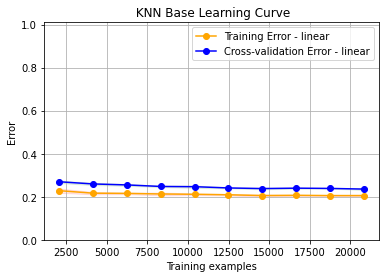

In [25]:

my_learn_curve(title=" KNN Base Learning Curve", 
               estimator=census_pipeline.fit(X_c_train,y_c_train), 
               cv=stratified_kfold,
               X=X_c_train, 
               y=y_c_train,  
               label_suffix="linear", 
               color_=["orange","blue"],
               shape = 'o-'  )

plt.savefig("KNN_census_base_learning_curve.pdf")


# my_learn_curve(title=" Support Vector Machine", 
#                estimator=census_pipeline_rbf, 
#                cv=stratified_kfold,
#                X=X_c_train, 
#                y=y_c_train,  
#                label_suffix="rbf", 
#                color_=["orange","blue"],
#                shape = 'x-'  )



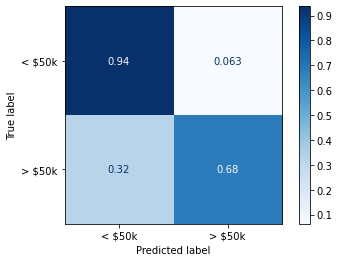

In [21]:
plot_confusion_matrix(estimator= census_pipeline.fit(X_c_train,y_c_train),
                      X=X_c_train,
                      y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["< $50k" ,"> $50k"]
                        )

## Complexity 


In [38]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(census_pipeline,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__n_neighbors",
                                            param_range =[ i for i in range (1,41, 5)] ,
                                            cv=cv)

param_range =   np.array([ i for i in range (1,101, 5)])
train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Complexity Curve - KNN")
plt.xlabel("k (nearest neighbors)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("KNN_census_n_Neighbors.pdf")

plt.show()

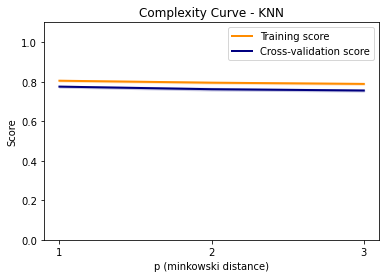

In [7]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
train_scores, valid_scores = validation_curve(census_pipeline,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__p",
                                            param_range =[ i for i in range (1,4, 1)] ,
                                            cv=cv)

param_range =   np.array([ i for i in range (1,4, 1)])
train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Complexity Curve - KNN")
plt.xlabel("p (minkowski distance)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.xticks([ i for i in range (1,4, 1)],[ i for i in range (1,4, 1)])

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("KNN_census_p.pdf")

plt.show()

In [9]:
# Set the parameters by cross-validation



tuned_parameters = {'model__n_neighbors': [i for i in range(1,20,1)], 
                    'model__p': [i for i in range(1,3,1)],
                    'model__weights': ["uniform","distance"]}
                    


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=45)
# define the grid search procedure
grid_search = GridSearchCV(estimator=census_pipeline, param_grid=tuned_parameters, 
                           n_jobs=-1, cv=cv, 
                           scoring='average_precision')
# execute the grid search
grid_result_l= grid_search.fit(X_c_train, y_c_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result_l.best_score_, grid_result_l.best_params_))
# summarize all scores that were evaluated
means = grid_result_l.cv_results_['mean_test_score']
stds = grid_result_l.cv_results_['std_test_score']
params = grid_result_l.cv_results_['params']

Best: 0.679478 usin g {'model__n_neighbors': 19, 'model__p': 1, 'model__weights': 'distance'}


## final pipelien

In [23]:
census_steps_f =[('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('scaler', StandardScaler()),
          ('under', RandomUnderSampler(random_state=62)),
        ("model",   KNeighborsClassifier(n_neighbors=19))]

census_pipeline_f = Pipeline(steps=census_steps)

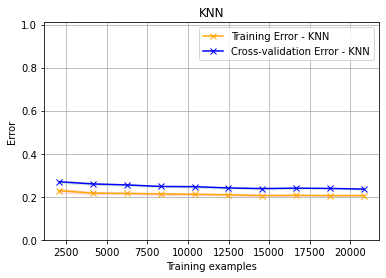

In [30]:
my_learn_curve(title="KNN", 
               estimator=census_pipeline_f.fit(X_c_train,y_c_train), 
               cv=stratified_kfold,
               X=X_c_train, 
               y=y_c_train,  
               label_suffix="KNN", 
               color_=["orange","blue"],
               shape = 'x-'  )

plt.savefig("final_census_learning_cirve_knn.pdf")


In [24]:
final_knn_c = census_pipeline_f.fit(X_c_train,y_c_train)

## AP 

In [30]:
average_precision_score(y_c_train,census_pipeline.fit(X_c_train,y_c_train).predict_proba(X_c_train)[:,1])

0.6617935082470394

In [25]:
average_precision_score(y_c_train,final_knn_c.predict_proba(X_c_train)[:,1] )

0.6617935082470394

In [28]:
average_precision_score(y_c_test,final_knn_c.predict_proba(X_c_test)[:,1] )

0.5707230496586965

## distance

In [35]:
print(grid_result_l.best_estimator_.get_params())
print(classification_report(y_c_train, grid_result_l.best_estimator_.predict(X_c_train) ))
print(classification_report(y_c_test, grid_result_l.best_estimator_.predict(X_c_test) ))

{'memory': None, 'steps': [('encoding', OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))), ('imputer', SimpleImputer(strategy='most_frequent')), ('scaler', StandardScaler()), ('under', RandomUnderSampler(random_state=62)), ('model', KNeighborsClassifier(n_neighbors=19, p=1, weights='distance'))], 'verbose': False, 'encoding': OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')), 'imputer': SimpleImputer(strategy='most_frequent'), 'scaler': StandardScaler(), 'under': RandomUnderSampler(random_state=62), 'model': KNeighborsClassifier(n_neighbors=19, p=1, weights='distance'), 'encoding__cols': Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'), 'encoding__drop_invariant': Fal

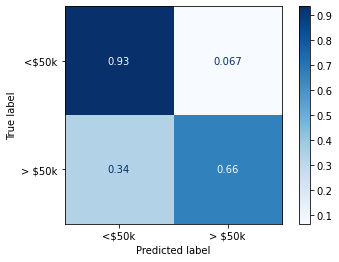

In [29]:
plot_confusion_matrix(estimator=  get_census_pipeline_final().fit(X_c_train, y_c_train),
                      X=X_c_train,
                      y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["<$50k" ,"> $50k"]
                        )